## Cluster Analysis
* Cluster analysis is a multivariate statistical technique that groups observations on the basis of some of their features and variables they are describe by.
* The goal of clustering is to maximize the similarity of the observations within a cluster and maximize the dissimilarity between clusters.
* Cluster analysis is a starting point before other types of analysis.
* Cluster analysis is a unsupervised machine learning technique. (The output we get is something that we must name ourselves)

## Math prerequisites
* Distance between two data points: Euclidean distance
* Centroid: A centroid is the mean position of a group of points (aka center of mass)

## K-Means Clustering
* 1. Choose the number of clusters.
* 2. Specify the cluster seeds. A seed is basically a starting centroid.
* 3. Assign each point to a seed based on its proximity.
* 4. Adjust the centroids.
* 5. Repeat step 3 and step 4.

## K-Means clustering with sklearn

In [19]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [20]:
# Loading data
data= pd.read_csv('2.1 3.01. Country clusters.csv')
data.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


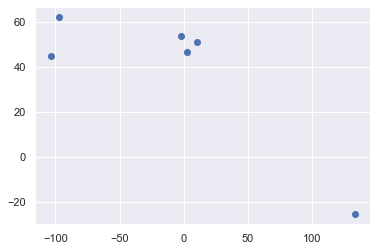

In [21]:
plt.scatter(data['Longitude'], data['Latitude'])

In [22]:
# select the features
x = data.iloc[:, 1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [23]:
# clustering
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [24]:
# clustering results
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1])

In [25]:
data_with_clusters = data.copy()
data_with_clusters['geogrephic_cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,geogrephic_cluster
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


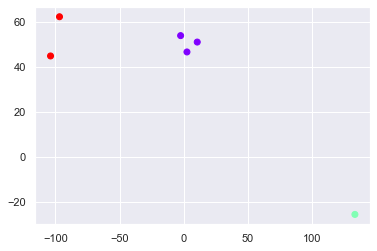

In [26]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['geogrephic_cluster'], cmap='rainbow')

## Clustering categorical data

In [27]:
data_with_clusters['Language_mapped'] = data_with_clusters['Language'].map({'English': 0, 'French': 1, 'German':2})
data_with_clusters

,Country,Latitude,Longitude,Language,geogrephic_cluster,Language_mapped
0,USA,44.97,-103.77,English,2,0
1,Canada,62.40,-96.80,English,2,0
2,France,46.75,2.40,French,0,1
3,UK,54.01,-2.53,English,0,0
4,Germany,51.15,10.40,German,0,2
5,Australia,-25.45,133.11,English,1,0


In [31]:
data_for_cluster = data_with_clusters.iloc[:, 5:6]
kmeans.fit(data_for_cluster)
identified_language_clusters = kmeans.fit_predict(data_for_cluster)
data_with_clusters['language_cluster'] = identified_language_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,geogrephic_cluster,Language_mapped,language_cluster
0,USA,44.97,-103.77,English,2,0,0
1,Canada,62.40,-96.80,English,2,0,0
2,France,46.75,2.40,French,0,1,1
3,UK,54.01,-2.53,English,0,0,0
4,Germany,51.15,10.40,German,0,2,2
5,Australia,-25.45,133.11,English,1,0,0


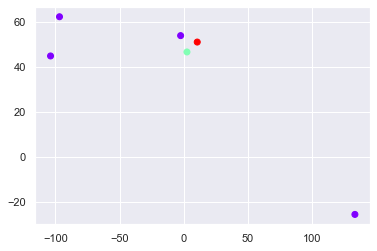

In [32]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['language_cluster'], cmap='rainbow')

## How to choose the number of clusters?
* The elbow method:
    * WCSS: within cluster sum of squares
    * If we minimize WCSS and at the same time fewer clusters as possible we have reached the perfect clustering solution.

* Calculating WCSS with inertia method

In [33]:
kmeans.inertia_

0.0

* We need to calculate WCSS for different number of clusters.

In [35]:
wcss = []
for i in range (1, 7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

Text(0.5, 1.0, 'Elbow Plot')

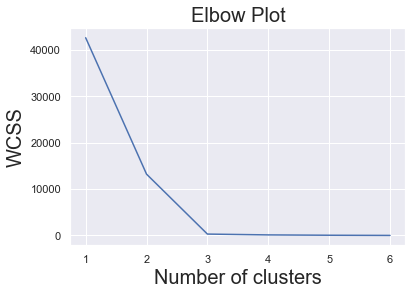

In [37]:
number_of_clusters = range(1, 7)
plt.plot(number_of_clusters, wcss)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('WCSS', fontsize=20)
plt.title('Elbow Plot', fontsize=20)

## Pros and Cons of K-Mean clustering
* Pros
    * 1. Simple to understand
    * 2. Fast to cluster
    * 3. Widely available
    * 4. easy to implement
    * 5. Always yields a result (also a con, as it may be deceiving)
* Cons and remedies
    * 1. We need to pick K
            * The elbow method
    * 2. Sensitive to initialization (if the initial seeds are problematic the whole solution is meaningless)
            * K-Means++ (sklearn automatically applies it by default)
    * 3. Sensitive to outliers
            * Remove outliers
    * 4. Produces spherical (circular) solutions (because we use distance from the centroid)
    * 5. Standardization
            * If we don't standardize the range of values serves as WEIGHTS for each variable. For beginners it's recommended to standardize before starting.
            * If we know that one variable is inherently more important than another then standardization shouldn't be used.

## How is clustering useful?
* Types of analysis
    * Exploratory
        * Get acquainted with the data
            * data visualization, descriptive, clustering
        * Search for patterns
        * Plan
    * Confirmatory
        * Confirm a hypothesis
        * Validate previous research
    * Explanatory
        * Explain a phenomenon
* Clustering can be used for all types of analysis but most commonly it is used for exploratory analysis.